## Ejercicio 1

Carga una imagen en escala de grises de 256 niveles de gris que tenga (claramente) poco constraste. Se pide:

a) **Justificar** que realmente se trata de una imagen de poco contraste calculando, visualizando y explicando su histograma.

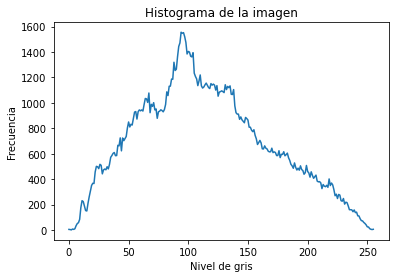

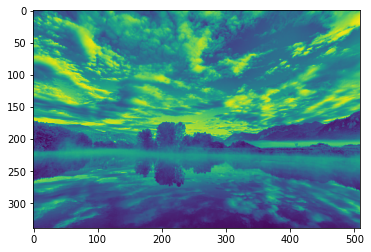

In [47]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
img = cv2.imread('imagen.jpg', cv2.IMREAD_GRAYSCALE)

# Calcular el histograma
hist = cv2.calcHist([img], [0], None, [256], [0,256])

# Visualizar el histograma
plt.plot(hist)
plt.title('Histograma de la imagen')
plt.xlabel('Nivel de gris')
plt.ylabel('Frecuencia')
plt.show()

plt.imshow(img)
plt.show()

# Si la distribución está concentrada en un rango pequeño de valores, se considera una imagen de bajo contraste

b) **Razonar** si una transformación de intensidades de tipo logaritmo o de potencias
(corrección gamma) podría mejorar en algo el contraste de la imagen. Después, aplicar
aquella que pudiera dar mejor resultado, especificando los parámetros escogidos. Los
parámetros deben ajustarse a priori para que el rango de salida siga siendo [0,255].

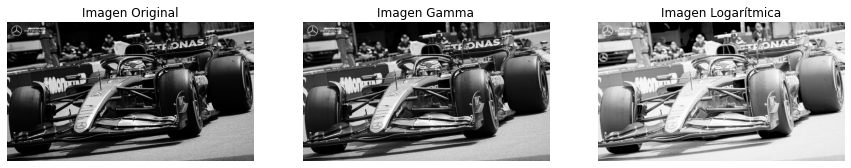

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
img = cv2.imread('imagen_2.jpg', cv2.IMREAD_GRAYSCALE)

# Asegurarse de que no haya valores cero en la imagen antes de aplicar log
# Añadir un pequeño valor (epsilon) para evitar log(0)
epsilon = 1e-5
img = img + epsilon

# 1. Aplicar la transformación logarítmica
c = 255 / np.log(1 + np.max(img))  # Escalar para asegurar que el rango esté entre 0 y 255
log_img = c * np.log(1 + img)  # Aplicar logaritmo

# 2. Aplicar la transformación de corrección gamma
gamma = 0.65  # Ajuste gamma
gamma_img = np.uint8(255 * (img / 255) ** gamma)

# Asegurarse de que el rango esté entre [0, 255] para ambas imágenes
log_img = np.uint8(np.clip(log_img, 0, 255))
gamma_img = np.uint8(np.clip(gamma_img, 0, 255))

# Mostrar las imágenes transformadas
plt.figure(figsize=(15, 5))

# Comparar con la imagen original
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Imagen logarítmica
plt.subplot(1, 3, 3)
plt.imshow(log_img, cmap='gray')
plt.title('Imagen Logarítmica')
plt.axis('off')

# Imagen de corrección gamma
plt.subplot(1, 3, 2)
plt.imshow(gamma_img, cmap='gray')
plt.title('Imagen Gamma')
plt.axis('off')

plt.show()

# La transformación logarítimica mejora el contraste en áreas oscuras de la imagen, 
# pero puede saturar las zonas brillantes. La corrección gamma es más adecuada para mejorar las áreas oscuras
# sin alterar demasiado las zonas brillantes, especialmente cuando el valor de gamma es menor a 1.

## Ejercicio 1
c) Realizar una ecualización del histograma y una expansión del histograma de la imagen
en escala de grises original que mejore el contraste. Comprobarlo comentando las
diferencias en los histogramas (original y mejorada). Comparar también los histogramas
resultantes de las dos operaciones de mejora de contraste.

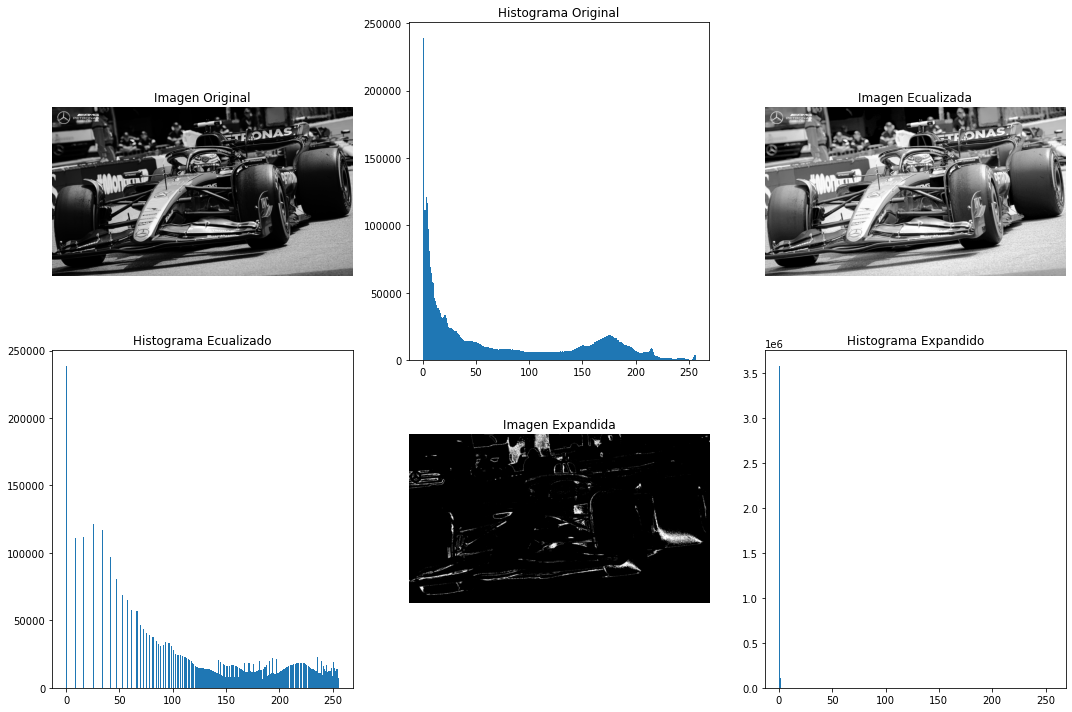

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
img = cv2.imread('imagen_2.jpg', cv2.IMREAD_GRAYSCALE)

# Ecualización del histograma
img_eq = cv2.equalizeHist(img)

# Expansión del histograma
min_val = np.min(img)
max_val = np.max(img)
expanded_img = 255 * (img - min_val) / (max_val - min_val)  # Normalizar y expandir

# Convertir a uint8
expanded_img = np.uint8(expanded_img)

# Mostrar las imágenes y los histogramas
plt.figure(figsize=(15, 10))

# Imagen original
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Histograma original
plt.subplot(2, 3, 2)
plt.hist(img.ravel(), bins=256, range=[0, 256])
plt.title('Histograma Original')

# Imagen ecualizada
plt.subplot(2, 3, 3)
plt.imshow(img_eq, cmap='gray')
plt.title('Imagen Ecualizada')
plt.axis('off')

# Histograma ecualizado
plt.subplot(2, 3, 4)
plt.hist(img_eq.ravel(), bins=256, range=[0, 256])
plt.title('Histograma Ecualizado')

# Imagen expandida
plt.subplot(2, 3, 5)
plt.imshow(expanded_img, cmap='gray')
plt.title('Imagen Expandida')
plt.axis('off')

# Histograma expandido
plt.subplot(2, 3, 6)
plt.hist(expanded_img.ravel(), bins=256, range=[0, 256])
plt.title('Histograma Expandido')

plt.tight_layout()
plt.show()

# La ecualización es una técnica que distribuye los niveles de gris manera más uniforme, 
# mejorando el rango contraste de la expansión, donde se ajustan los niveles de grises para 
# ocupar el rango completo[0, 255], lo que mejora el contraste en las áreas de la imagen con poco contraste

## Ejercicio 1
d) Obtener y visualizar la imagen del valor absoluto de la diferencia entre la original y la
mejorada del apartado anterior. ¿Podría usarse esto para dar una medida del error
cometido? ¿Cómo podría darse una medida que no dependa del tamaño de la imagen?
Investiga qué medidas de error puedes encontrar implementadas en el software o
librerías que estés usando.

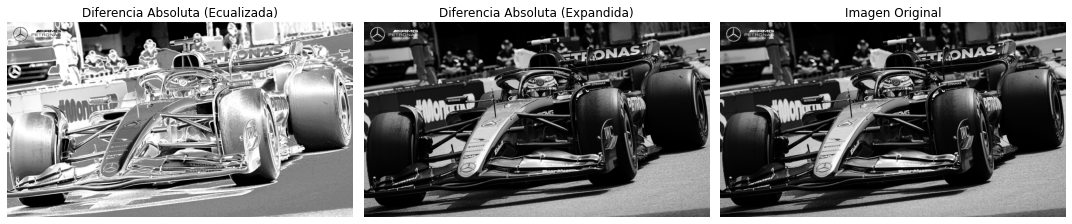

MSE (Ecualizada): 111.25211208767361
PSNR (Ecualizada): 27.66772096187392 dB
MSE (Expandida): 87.50788818359375
PSNR (Expandida): 28.71033157671912 dB


In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
img = cv2.imread('imagen_2.jpg', cv2.IMREAD_GRAYSCALE)

# Ecualización del histograma
img_eq = cv2.equalizeHist(img)

# Expansión del histograma
min_val = np.min(img)
max_val = np.max(img)
expanded_img = 255 * (img - min_val) / (max_val - min_val)  # Normalizar y expandir
expanded_img = np.uint8(expanded_img)

# Obtener la diferencia absoluta entre la imagen original y la ecualizada
diff_eq = cv2.absdiff(img, img_eq)

# Obtener la diferencia absoluta entre la imagen original y la expandida
diff_expanded = cv2.absdiff(img, expanded_img)

# Mostrar las imágenes de las diferencias
plt.figure(figsize=(15, 10))

# Imagen de la diferencia (ecualizada)
plt.subplot(1, 3, 1)
plt.imshow(diff_eq, cmap='gray')
plt.title('Diferencia Absoluta (Ecualizada)')
plt.axis('off')

# Imagen de la diferencia (expandida)
plt.subplot(1, 3, 2)
plt.imshow(diff_expanded, cmap='gray')
plt.title('Diferencia Absoluta (Expandida)')
plt.axis('off')

# Imagen original
plt.subplot(1, 3, 3)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.tight_layout()
plt.show()

# Cálculo de medidas de error: MSE y PSNR
def mse(imageA, imageB):
    # Calcula el error cuadrático medio
    err = np.sum((imageA - imageB) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def psnr(imageA, imageB):
    # Calcula el pico de la relación señal a ruido (PSNR)
    mse_val = mse(imageA, imageB)
    if mse_val == 0:
        return 100  # Si no hay error, PSNR es infinito
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse_val))

# Calcular MSE y PSNR para la diferencia entre la imagen original y las transformadas
mse_eq = mse(img, img_eq)
psnr_eq = psnr(img, img_eq)

mse_expanded = mse(img, expanded_img)
psnr_expanded = psnr(img, expanded_img)

print(f'MSE (Ecualizada): {mse_eq}')
print(f'PSNR (Ecualizada): {psnr_eq} dB')

print(f'MSE (Expandida): {mse_expanded}')
print(f'PSNR (Expandida): {psnr_expanded} dB')


### Prácticas
1. Carga una imagen en escala de grises que tenga bastante contraste.
2. Usa una transformación lineal para aclarar la imagen pero de manera
que los valores sigan estando entre [0 y 255] (por ejemplo, que todos los17
niveles de gris estén en [100, 255]).

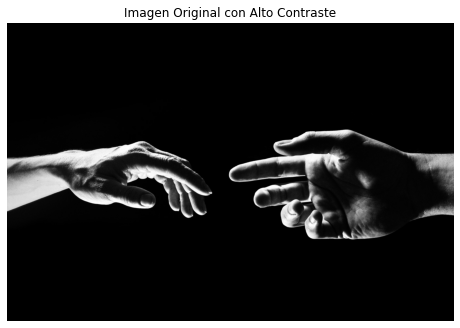

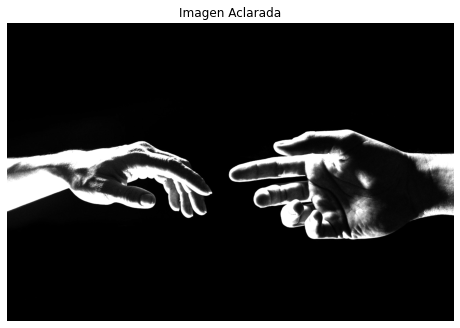

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar la imagen en escala de grises
img = cv2.imread('imagen_3.jpg', cv2.IMREAD_GRAYSCALE)

# Visualizar la imagen original
plt.figure(figsize=(8, 6))
plt.imshow(img, cmap='gray')
plt.title('Imagen Original con Alto Contraste')
plt.axis('off')
plt.show()

# 2. Aplicar una transformación lineal para aclarar la imagen
# Ajustar los niveles de gris sumando un valor constante
# Aquí sumamos un valor constante de 50, esto aclarará toda la imagen sin perder contraste

value_to_add = 100  # Valor constante que se añadirá para aclarar la imagen
img_brighter = cv2.add(img, value_to_add)  # La función add asegura que no se pase de 255

# Visualizar la imagen aclarada
plt.figure(figsize=(8, 6))
plt.imshow(img_brighter, cmap='gray')
plt.title('Imagen Aclarada')
plt.axis('off')
plt.show()



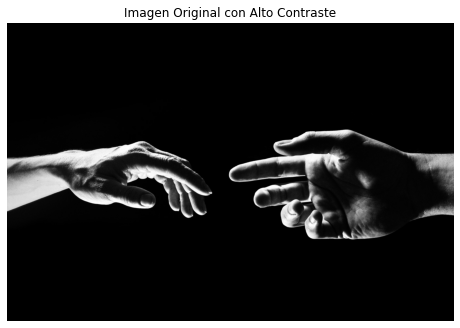

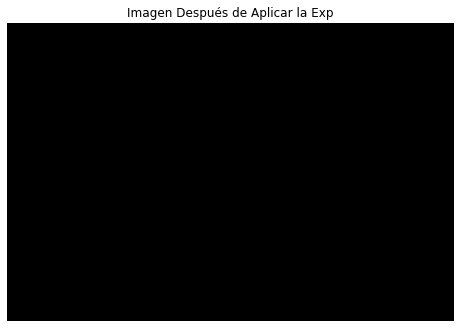

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar la imagen en escala de grises
img = cv2.imread('imagen_3.jpg', cv2.IMREAD_GRAYSCALE)

# Visualizar la imagen original
plt.figure(figsize=(8, 6))
plt.imshow(img, cmap='gray')
plt.title('Imagen Original con Alto Contraste')
plt.axis('off')
plt.show()

# 2. Calcular la constante para que el valor máximo de la imagen sea 255
max_val = np.max(img)  # Encuentra el valor máximo de la imagen
scaling_factor = 255 / max_val  # Constante para normalizar la imagen

# Escalar la imagen para que el valor máximo sea 255
img_scaled = img * scaling_factor

# Asegurarse de que la imagen no tenga valores fuera del rango [0, 255]
img_scaled = np.uint8(np.clip(img_scaled, 0, 255))

# 3. Aplicar la función exponencial a la imagen
# Usamos np.exp() para aplicar la transformación exponencial a la matriz
img_exp = np.exp(img_scaled / 255)  # Normalizamos para evitar saturación

# Escalar la imagen exponencial para mantener el rango [0, 255]
img_exp = np.uint8(np.clip(img_exp * 255, 0, 255))

# Visualizar la imagen después de aplicar la transformación exponencial
plt.figure(figsize=(8, 6))
plt.imshow(img_exp, cmap='gray')
plt.title('Imagen Después de Aplicar la Exp')
plt.axis('off')
plt.show()
